![titanic](titanic.jpg)


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('titanic_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What data is actually missing?

In [8]:
missing_count = data.isnull().sum().sort_values(ascending=False)
percentage = (missing_count / data.shape[0]) *100
percentage = round(percentage,1)
missing_df = pd.concat([missing_count, percentage], keys = ['Total Missing', '%'], axis=1) 
print(missing_df.head(3))

          Total Missing     %
Cabin               687  77.1
Age                 177  19.9
Embarked              2   0.2


- `Embarked` feature has only 2 missing values, which can easily be filled.
- `Age` has 177 missing values which are 19% of the whole dataset, so it can be filled but more trickier than the `Embarked`
- 77% of the `Cabin` values are missing so we might drop it.

# Feature Engineering

### Cleaning

Deleting features that's not important/not contribute to the survival of passengers.

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.drop(['Name','Fare', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [12]:
data['Age'] = data['Age'].fillna(0)

# Visual Data Exploration

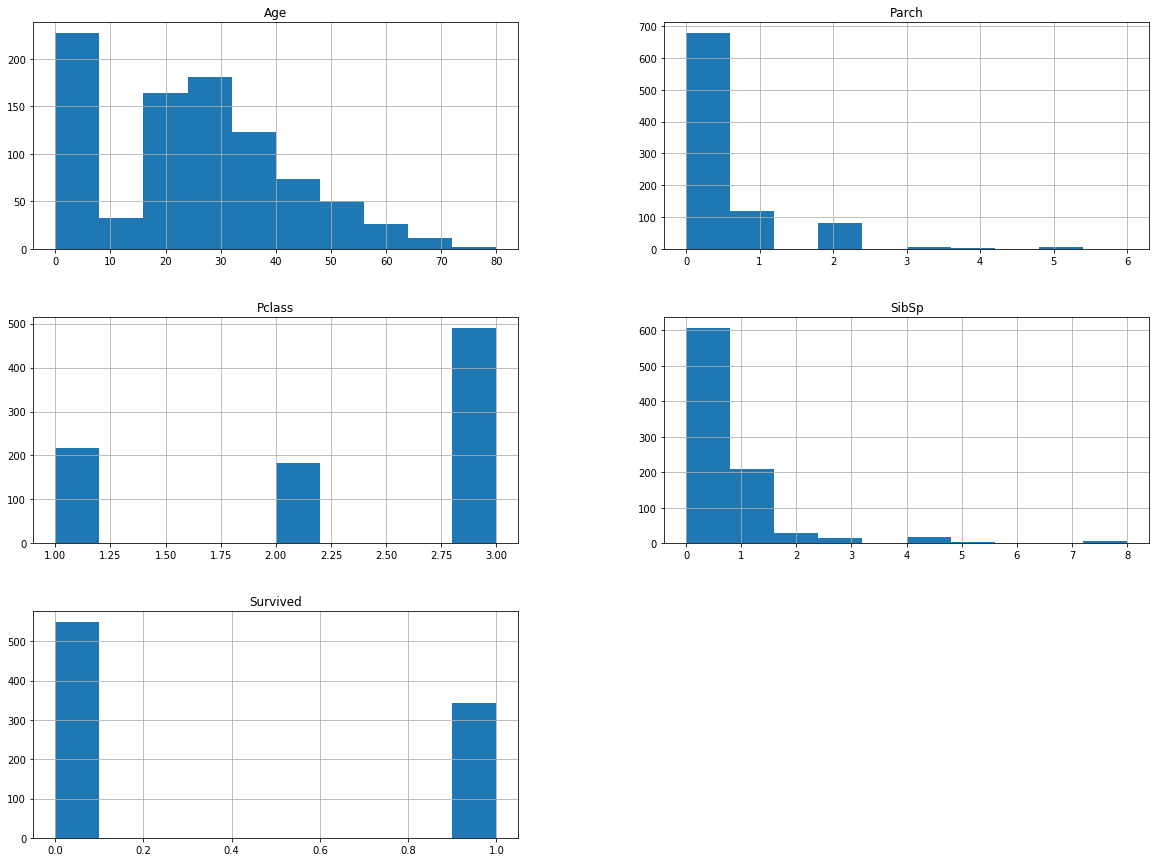

In [13]:
data.hist(bins=10, figsize=(20,15))
plt.show()

# Getting Facts

In [14]:
df = data

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

## Age, Sex and Survival

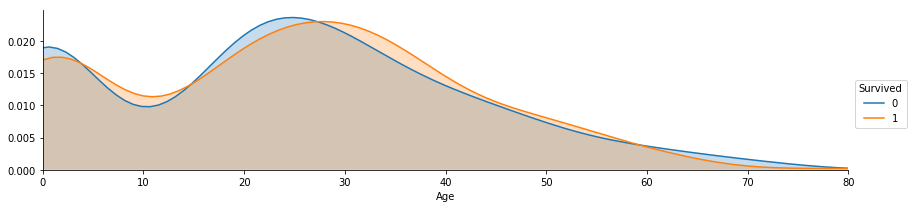

In [18]:
FacetGrid = sns.FacetGrid(df, hue='Survived', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True)
FacetGrid.set(xlim=(0, df['Age'].max()))
FacetGrid.add_legend()

male
Number of  male :  577
Number of  male Survived:  109
Percantage of  male survived:  18.89 %


female
Number of  female :  314
Number of  female Survived:  233
Percantage of  female survived:  74.20 %




/home/noreen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/noreen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/noreen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/noreen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


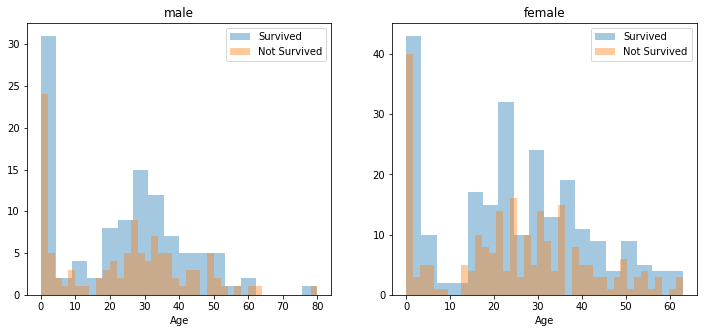

In [19]:
survived = 'Survived'
not_survived = 'Not Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


for i,gen in enumerate(df['Sex'].unique()):
    print(gen)
    gender = df[df['Sex'] == gen]
    print("Number of ", gen, ": ", gender.shape[0])
    gender_survived = gender[gender['Survived'] == 1]
    gender_not_survived = gender[gender['Survived'] == 0]
    print("Number of ", gen, "Survived: ", gender_survived.shape[0])
    survival_percentage = (gender_survived.shape[0] / gender.shape[0])*100
    print("Percantage of ", gen, "survived: ", "%.2f" % survival_percentage, "%")
    print("\n ====== \n")
    
    
    #plot
    ax = sns.distplot(gender_survived.Age, bins= 18, label= survived, ax= axes[i], kde=False)
    ax = sns.distplot(gender_survived.Age, bins=40, label= not_survived, ax= axes[i], kde=False)
    ax.legend()
    ax.set_title(gen)
plt.show()
    

`Age` vs. `Sex` Survival
===========================================

**Male:**

Males between 18 to 30 years old are most likely to survive.

**Female:**

Females between 15 to 40 are most likely to survive.

**Infants:**

 Infants also have higher probability of survival.

##### Embarked, Pclass and Sex:




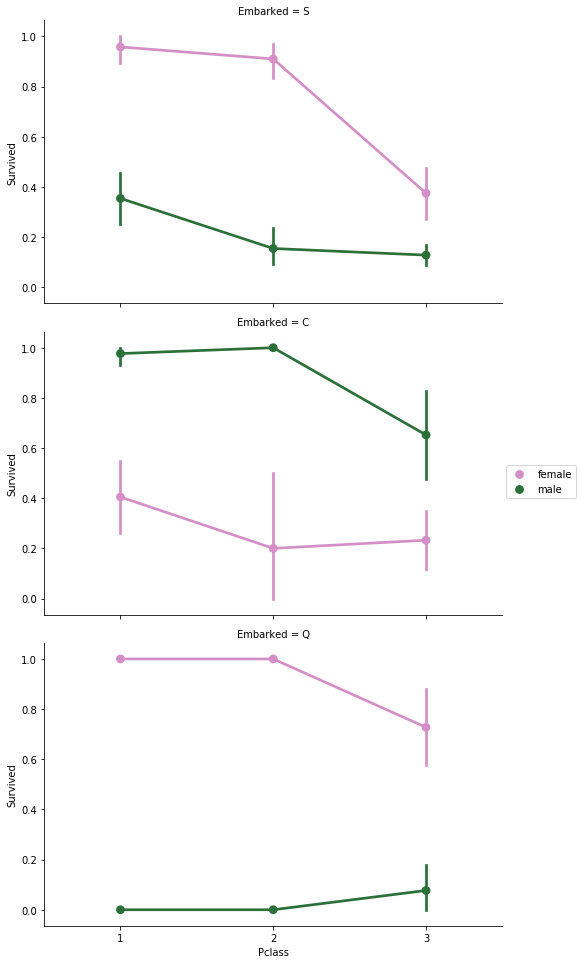

In [20]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size= 4.5, aspect= 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="cubehelix", order=None, hue_order=None)
FacetGrid.add_legend()

### Embarked, Pclass and Sex **Observation**:

**Female:**
Females are more likely to survive on port Q and S, while they have less chance of survival on port C.

**Male:**
Males have higher chance of survival on port C and less chance of survival on port Q and S.

_**Note:**_ It seems like the `Pclass` is also correlated with survival rate so we need to investigate more on that.


## Pclass vs. Survival

In [21]:
for cls in df['Pclass'].unique():
    print("class: ", cls)
    cls_passengers = df[df['Pclass'] == cls]
    print("Number of passengers in class", cls, ": ",  cls_passengers.shape[0])
    cls_survived = cls_passengers[cls_passengers['Survived'] == 1]
    print("Number of passengers survived in class ", cls, ":", cls_survived.shape[0])
    cls_survival_percentage = (cls_survived.shape[0] / cls_passengers.shape[0])*100
    print("Percantage of passengers survived in class ",cls, ": ", "%.2f" % cls_survival_percentage, "%") 
    print("\n ====== \n")

class:  3
Number of passengers in class 3 :  491
Number of passengers survived in class  3 : 119
Percantage of passengers survived in class  3 :  24.24 %


class:  1
Number of passengers in class 1 :  216
Number of passengers survived in class  1 : 136
Percantage of passengers survived in class  1 :  62.96 %


class:  2
Number of passengers in class 2 :  184
Number of passengers survived in class  2 : 87
Percantage of passengers survived in class  2 :  47.28 %




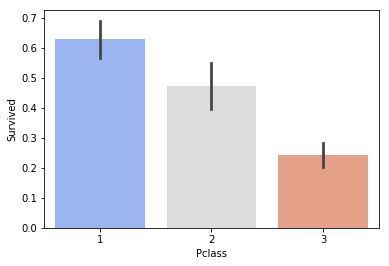

In [55]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='coolwarm')

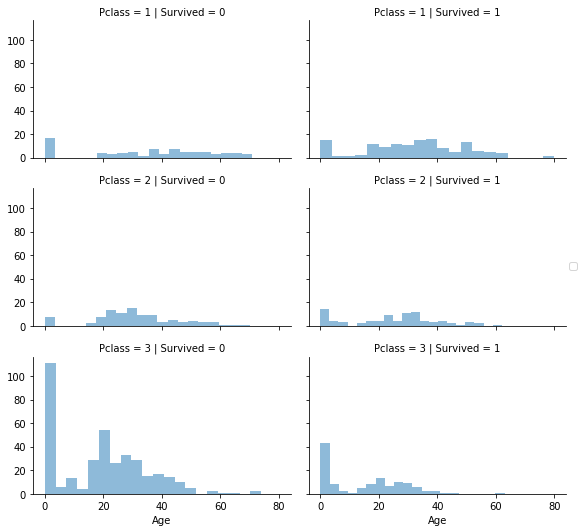

In [23]:
FacetGrid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.5, aspect=1.6)
FacetGrid.map(plt.hist, 'Age', bins=20, alpha = 0.5)
FacetGrid.add_legend()

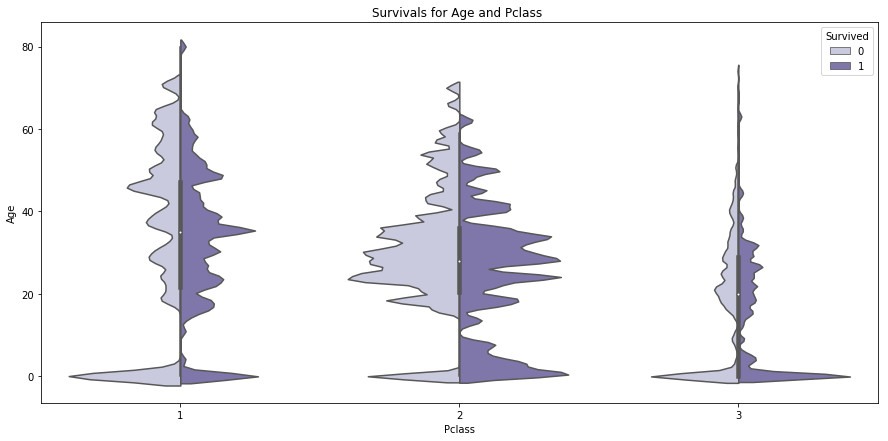

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df, split=True, bw=0.05 , palette='Purples', ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

/home/noreen/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/noreen/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


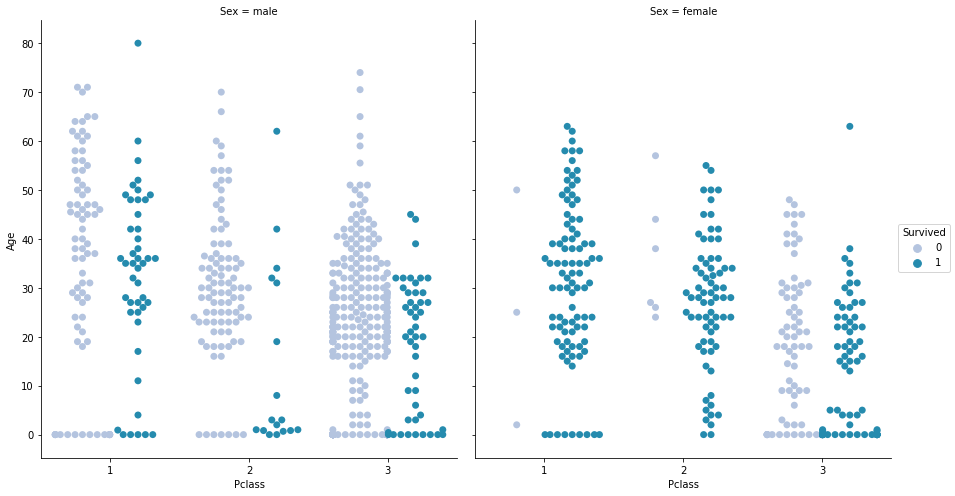

In [25]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df, kind="swarm", split=True, palette='PuBuGn', size=7, aspect=.9, s=7)

## Pclass vs. Survival Observation
A person in Pclass 1 has high probability to survive while the inverse is True for Pclass 3 which has a high probability not to survive. 

## SibSp and Parch:

In [26]:
for dataset in [df]:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Alone'] =1
    dataset['Alone'] = dataset['Alone'].astype(int)
pd.crosstab(df.Relatives,df.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')


Survived,0,1
Relatives,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.8,0.2
5,0.863636,0.136364
6,0.666667,0.333333
7,1,0
10,1,0


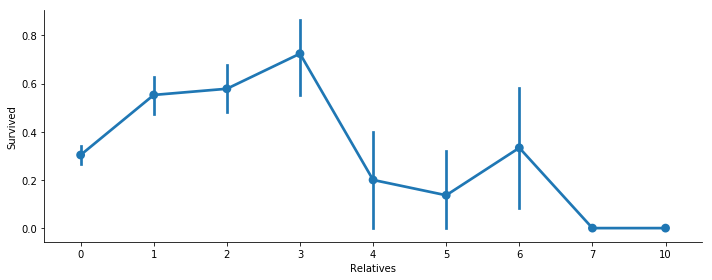

In [27]:
sns.factorplot('Relatives', 'Survived', data = df, aspect=2.5)

## SibSp and Parch Observation:
If a person has siblings between 1 to 3 then he has a higher probability of survivial, while having number of siblings less than 1 or greater than 3 makes the chance of survival very low except for some cases with 6 siblings.

In [28]:
df['Age_Cat'] = df['Age']

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Relatives,Alone,Age_Cat
0,0,3,male,22.0,1,0,NaN,S,1,0,22.0
1,1,1,female,38.0,1,0,C85,C,1,0,38.0
2,1,3,female,26.0,0,0,NaN,S,0,1,26.0
3,1,1,female,35.0,1,0,C123,S,1,0,35.0
4,0,3,male,35.0,0,0,NaN,S,0,1,35.0


In [30]:
def age_to_cat(age):
    if age <4:
        return 0 #baby
    elif age <10:
        return 1 #child
    elif age <21:
        return 2 #teen
    elif age <33:
        return 3 #young adult
    elif age <50: #adult
        return 4
    return 5 #elder

age_cat = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "yound adult",
    4: "adult",
    5: "elder"
}
    

In [31]:
df['Age_Cat'] = df['Age'].apply(age_to_cat)

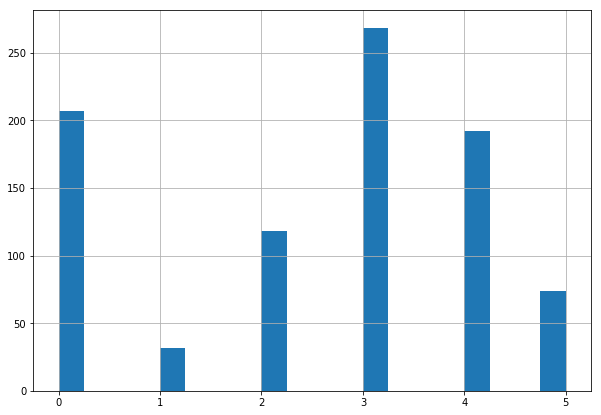

In [32]:
df['Age_Cat'].hist(bins=20, figsize=(10,7))
plt.show()